In [1]:
import pandas as pd

file_path = r'/Users/sadebeckles/Downloads/Zillow data.csv'

# Load the file using the correct delimiter
df = pd.read_csv(file_path, sep=';', encoding='utf-8', on_bad_lines='skip')

# Show the first few rows
print("✅ Fixed and loaded with correct separator.\n")
display(df.head())

# Show column names
print("🔹 Columns:")
print(df.columns.tolist())


✅ Fixed and loaded with correct separator.



id                                                url     price  \
0    43065621  https://www.zillow.com/homedetails/6240-NE-19t...    875000   
1    43122259  https://www.zillow.com/homedetails/3200-NE-36t...    440000   
2   110557541  https://www.zillow.com/homedetails/725-Poincia...  24995000   
3  2057625481  https://www.zillow.com/homedetails/509-SE-19th...    999000   
4   443040254  https://www.zillow.com/homedetails/1800-N-Andr...    259900   

  currency    status                      brokerName  beds  baths  \
0        $  FOR_SALE         By The Sea Realty, Inc.   2.0      2   
1        $  FOR_SALE        Dynasty Realty Group Inc   2.0      2   
2        $  FOR_SALE  Coast Properties of S. Florida   6.0      9   
3        $  FOR_SALE       The Real Estate Lab, Inc.   3.0      5   
4        $  FOR_SALE   Atlantic Properties Int'l Inc   2.0      2   

                                         fullAddress             city state  \
0        6240 NE 19th Ave, Fort Lauderdale, FL 33308  Fort Lauderdale    FL   
1  3200 NE 36th St UNIT 1012, Fort Lauderdale, FL...  Fort Lauderdale    FL   
2        725 Poinciana Dr, Fort Lauderdale, FL 33301  Fort Lauderdale    FL   
3          509 SE 19th St, Fort Lauderdale, FL 33316  Fort Lauderdale    FL   
4  1800 N Andrews Ave UNIT PHG, Fort Lauderdale, ...  Fort Lauderdale    FL   

                        street  zipcode   latitude  longitude  \
0             6240 NE 19th Ave    33308  26.204727  -80.12133   
1    3200 NE 36th St UNIT 1012    33308  26.171873  -80.10253   
2             725 Poinciana Dr    33301  26.113033  -80.11162   
3               509 SE 19th St    33316  26.097689  -80.13733   
4  1800 N Andrews Ave UNIT PHG    33311  26.150827  -80.14506   

                                               image  \
0  https://photos.zillowstatic.com/fp/6a55bd83db6...   
1  https://photos.zillowstatic.com/fp/7dbcb2af168...   
2  https://photos.zillowstatic.com/fp/b045fe131cb...   
3  https://photos.zillowstatic.com/fp/f722abd4c2a...   
4  https://photos.zillowstatic.com/fp/f9d95e46f23...   

                                              photos  
0  https://photos.zillowstatic.com/fp/6a55bd83db6...  
1  https://photos.zillowstatic.com/fp/7dbcb2af168...  
2  https://photos.zillowstatic.com/fp/b045fe131cb...  
3  https://photos.zillowstatic.com/fp/f722abd4c2a...  
4  https://photos.zillowstatic.com/fp/f9d95e46f23...

🔹 Columns:
['id', 'url', 'price', 'currency', 'status', 'brokerName', 'beds', 'baths', 'fullAddress', 'city', 'state', 'street', 'zipcode', 'latitude', 'longitude', 'image', 'photos']


In [2]:
# Convert price column to numeric (remove commas, handle errors)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Filter for properties under $400,000
df = df[df['price'] <= 400000].copy()
print(f"Properties under $400K: {len(df)}")

# Preview data
df[['fullAddress', 'price', 'beds', 'baths']].head()


Properties under $400K: 27


fullAddress     price  beds  baths
4   1800 N Andrews Ave UNIT PHG, Fort Lauderdale, ...  259900.0   2.0      2
5   3909 N Ocean Blvd UNIT 211, Fort Lauderdale, F...  345000.0   2.0      2
9      344 City View Drive, Fort Lauderdale, FL 33311  395000.0   2.0      2
16  2260 NE 67th Street #1705, Fort Lauderdale, FL...  175000.0   1.0      2
17  6110 NW 34th Ter UNIT 6110, Fort Lauderdale, F...  395000.0   2.0      2

In [3]:
# Split the dataset in half
df_low = df.sample(frac=0.5, random_state=1)
df_high = df.drop(df_low.index)

# Conservative rent scenario
df_low['est_rent'] = df_low['price'] * 0.008

# Aggressive rent scenario
df_high['est_rent'] = df_high['price'] * 0.009

# Combine the two back
df = pd.concat([df_low, df_high])


df['monthly_expenses'] = df['est_rent'] * 0.50
df['loan_amount'] = df['price'] * 0.75
df['mortgage_payment'] = (df['loan_amount'] / 100000) * 537  # Simulate 5% interest
df['cash_flow'] = df['est_rent'] - df['monthly_expenses'] - df['mortgage_payment']
df['cash_invested'] = df['price'] * 0.25
df['annual_cash_flow'] = df['cash_flow'] * 12
df['coc_return'] = (df['annual_cash_flow'] / df['cash_invested']) * 100

In [4]:
# Step 5: Reclassify deal quality
df['deal_rating'] = df.apply(
    lambda row: '✅ Good Buy' if row['cash_flow'] > 0 else '❌ Avoid',
    axis=1
)

# Step 6: Convert to binary target for ML
df['target'] = df['deal_rating'].apply(lambda x: 1 if x == '✅ Good Buy' else 0)

# Step 7: Confirm class balance
print(df['target'].value_counts())

# Step 8: Preview updated dataset
df[['fullAddress', 'price', 'est_rent', 'cash_flow', 'coc_return', 'deal_rating']].sort_values('cash_flow', ascending=False).head(10)


target
0    14
1    13
Name: count, dtype: int64


fullAddress     price  est_rent  \
95       3680 Jackson Blvd, Fort Lauderdale, FL 33312  400000.0    3600.0   
43  5201 SW 31st Ave UNIT 255, Fort Lauderdale, FL...  399900.0    3599.1   
84  1900 S Ocean Dr APT 1011, Fort Lauderdale, FL ...  375000.0    3375.0   
19           (undisclosed Address), Tamarac, FL 33309  370000.0    3330.0   
23  3020 NE 32nd Ave UNIT 510, Fort Lauderdale, FL...  359000.0    3231.0   
5   3909 N Ocean Blvd UNIT 211, Fort Lauderdale, F...  345000.0    3105.0   
30  6407 Bay Club Drive UNIT 3, Fort Lauderdale, F...  289000.0    2601.0   
48  3233 NE 34th St UNIT 1403, Fort Lauderdale, FL...  259900.0    2339.1   
4   1800 N Andrews Ave UNIT PHG, Fort Lauderdale, ...  259900.0    2339.1   
21  3333 NE 34th St UNIT 1118, Fort Lauderdale, FL...  229000.0    2061.0   

    cash_flow  coc_return deal_rating  
95  189.00000       2.268  ✅ Good Buy  
43  188.95275       2.268  ✅ Good Buy  
84  177.18750       2.268  ✅ Good Buy  
19  174.82500       2.268  ✅ Good Buy  
23  169.62750       2.268  ✅ Good Buy  
5   163.01250       2.268  ✅ Good Buy  
30  136.55250       2.268  ✅ Good Buy  
48  122.80275       2.268  ✅ Good Buy  
4   122.80275       2.268  ✅ Good Buy  
21  108.20250       2.268  ✅ Good Buy

In [5]:
# Create a binary target: 1 if it's a Good Buy, 0 otherwise
df['target'] = df['deal_rating'].apply(lambda x: 1 if x == '✅ Good Buy' else 0)

# Check class balance
df['target'].value_counts()


target
0    14
1    13
Name: count, dtype: int64

In [6]:
# One-hot encode zipcode and keep all modeling features including target
df_model = pd.get_dummies(
    df[['price', 'beds', 'baths', 'est_rent', 'zipcode', 'target']],
    columns=['zipcode'],
    drop_first=True
)


In [7]:
from sklearn.model_selection import train_test_split

X = df_model.drop('target', axis=1)
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



Confusion Matrix:
 [[2 1]
 [1 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



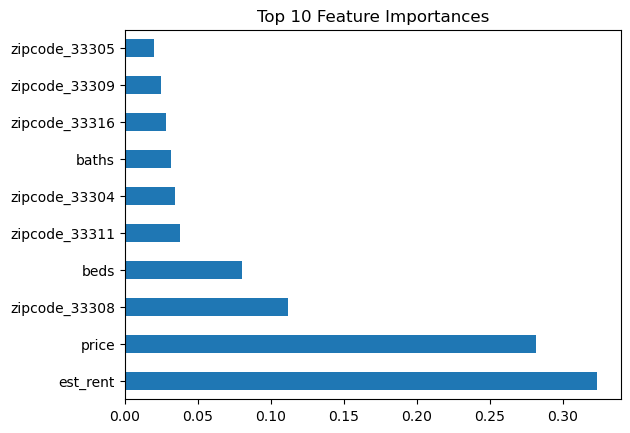

In [9]:
# Print results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [10]:
df['target'].value_counts()


target
0    14
1    13
Name: count, dtype: int64

In [11]:
# Predict on all rows using the trained model
df_model['prediction'] = model.predict(X)

# Add the prediction back to the original dataframe for easy interpretation
df['model_prediction'] = df_model['prediction']

# Optional: Add a label column for human readability
df['model_deal_label'] = df['model_prediction'].apply(lambda x: '✅ Good Buy (Predicted)' if x == 1 else '❌ Avoid (Predicted)')


In [12]:
# Compare actual vs. predicted
df[['fullAddress', 'price', 'cash_flow', 'target', 'model_prediction', 'deal_rating', 'model_deal_label']].head(10)


fullAddress     price  cash_flow  \
51  533 NE 3rd ave UNIT 229, Fort Lauderdale, FL 3...  350000.0   -9.62500   
42   809 NE 17th Ave APT 3, Fort Lauderdale, FL 33304  184900.0   -5.08475   
53  3300 NE 36th St UNIT 611, Fort Lauderdale, FL ...  230000.0   -6.32500   
16  2260 NE 67th Street #1705, Fort Lauderdale, FL...  175000.0   -4.81250   
82  2200 NE 33rd Ave APT 2J, Fort Lauderdale, FL 3...  325000.0   -8.93750   
27  888 Intracoastal Dr UNIT 14F, Fort Lauderdale,...  345000.0   -9.48750   
63  305 NE 16th St UNIT C8, Fort Lauderdale, FL 33304  180000.0   -4.95000   
67  3233 NE 34th St UNIT 1706, Fort Lauderdale, FL...  259000.0   -7.12250   
17  6110 NW 34th Ter UNIT 6110, Fort Lauderdale, F...  395000.0  -10.86250   
9      344 City View Drive, Fort Lauderdale, FL 33311  395000.0  -10.86250   

    target  model_prediction deal_rating        model_deal_label  
51       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
42       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
53       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
16       0                 1     ❌ Avoid  ✅ Good Buy (Predicted)  
82       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
27       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
63       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
67       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
17       0                 0     ❌ Avoid     ❌ Avoid (Predicted)  
9        0                 0     ❌ Avoid     ❌ Avoid (Predicted)

In [13]:
# View top predicted "Good Buys" ranked by cash flow
df[df['model_prediction'] == 1][['fullAddress', 'price', 'cash_flow', 'coc_return']].sort_values('cash_flow', ascending=False).head(10)


fullAddress     price  cash_flow  \
95       3680 Jackson Blvd, Fort Lauderdale, FL 33312  400000.0  189.00000   
43  5201 SW 31st Ave UNIT 255, Fort Lauderdale, FL...  399900.0  188.95275   
84  1900 S Ocean Dr APT 1011, Fort Lauderdale, FL ...  375000.0  177.18750   
19           (undisclosed Address), Tamarac, FL 33309  370000.0  174.82500   
23  3020 NE 32nd Ave UNIT 510, Fort Lauderdale, FL...  359000.0  169.62750   
5   3909 N Ocean Blvd UNIT 211, Fort Lauderdale, F...  345000.0  163.01250   
30  6407 Bay Club Drive UNIT 3, Fort Lauderdale, F...  289000.0  136.55250   
4   1800 N Andrews Ave UNIT PHG, Fort Lauderdale, ...  259900.0  122.80275   
48  3233 NE 34th St UNIT 1403, Fort Lauderdale, FL...  259900.0  122.80275   
21  3333 NE 34th St UNIT 1118, Fort Lauderdale, FL...  229000.0  108.20250   

    coc_return  
95       2.268  
43       2.268  
84       2.268  
19       2.268  
23       2.268  
5        2.268  
30       2.268  
4        2.268  
48       2.268  
21       2.268

In [14]:
model_columns = df_model.drop("target", axis=1).columns.tolist()
print(model_columns)


['price', 'beds', 'baths', 'est_rent', 'zipcode_33304', 'zipcode_33305', 'zipcode_33306', 'zipcode_33308', 'zipcode_33309', 'zipcode_33311', 'zipcode_33312', 'zipcode_33315', 'zipcode_33316', 'prediction']


In [15]:
model_columns = [
    'price', 'beds', 'baths', 'est_rent',
    'zipcode_33304', 'zipcode_33305', 'zipcode_33306',
    'zipcode_33308', 'zipcode_33309', 'zipcode_33311',
    'zipcode_33312', 'zipcode_33315', 'zipcode_33316'
]


In [16]:
import pickle

# Save the trained model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved to model.pkl")


✅ Model saved to model.pkl
